In [1]:
import pandas as pd
from ydata_profiling import ProfileReport
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import warnings
from sklearn.feature_selection import chi2

### **Overview Statistics**

In [2]:
df_org = pd.read_csv("Base.csv")

In [3]:
profile = ProfileReport(df_org, title="Bank Fraud Detection Profiling Report", explorative=True)

In [4]:
# profile.to_notebook_iframe()

In [5]:
# Remove "device_fraud_count" column as it is all 0
print(df_org['device_fraud_count'].value_counts())
df_org.drop(['device_fraud_count'], axis=1, inplace=True) 

device_fraud_count
0    1000000
Name: count, dtype: int64


In [6]:
df = df_org.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
# Number of unique values for each feature
df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [9]:
# Features with string data type
df.describe(include=["object", "bool"]).transpose()

,count,unique,top,freq
payment_type,1000000,5,AB,370554
employment_status,1000000,7,CA,730252
housing_status,1000000,7,BC,372143
source,1000000,2,INTERNET,992952
device_os,1000000,5,other,342728


In [10]:
df.head(10)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,9,0,1500.0,0,INTERNET,16.224843,linux,1,1,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,2,0,1500.0,0,INTERNET,3.363854,other,1,1,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,30,0,200.0,0,INTERNET,22.730559,windows,0,1,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,1,0,200.0,0,INTERNET,15.215816,linux,1,1,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,26,0,200.0,0,INTERNET,3.743048,other,0,1,0
5,0,0.6,0.294840,-1,369,30,0.024232,-1.232556,AD,1204,...,30,0,200.0,0,INTERNET,6.987316,linux,1,1,0
6,0,0.2,0.773085,22,4,40,0.006919,-0.544676,AB,1998,...,1,0,200.0,0,INTERNET,28.199923,x11,1,1,0
7,0,0.8,0.153880,-1,103,40,0.045122,-1.101184,AB,1548,...,25,1,200.0,0,INTERNET,11.234264,other,1,1,0
8,0,0.3,0.523655,21,2,30,0.035206,-0.955737,AB,1781,...,2,0,200.0,0,INTERNET,5.329387,other,1,1,0
9,0,0.8,0.834475,-1,134,20,0.017245,-1.356393,AD,3113,...,15,0,1500.0,0,INTERNET,4.103970,other,1,1,0


### **Handling Missing Values**

In [11]:
# Features with missing values represented by negative values according to documentation
missing_features = ['prev_address_months_count', 'current_address_months_count', 'intended_balcon_amount', 
                    'bank_months_count', 'session_length_in_minutes', 'device_distinct_emails_8w']
missing_vals_df = pd.DataFrame()

# Replace negative values with NaN, then calculate the percentage of missing values for fraud and non-fraud cases
for feature in missing_features:
    df[feature] = df[feature].apply(lambda x: x if x >= 0 else np.nan)
    missing_vals_df[feature] = df.groupby('fraud_bool')[feature].apply(lambda x: x.isnull().mean() * 100)

missing_vals_df = missing_vals_df.reset_index().melt(id_vars='fraud_bool', var_name='feature', value_name='missing_percentage')
missing_vals_df

,fraud_bool,feature,missing_percentage
0,0,prev_address_months_count,71.062347
1,1,prev_address_months_count,91.885030
2,0,current_address_months_count,0.428728
3,1,current_address_months_count,0.126938
4,0,intended_balcon_amount,74.094791
5,1,intended_balcon_amount,88.376099
6,0,bank_months_count,25.227737
7,1,bank_months_count,37.537401
8,0,session_length_in_minutes,0.201927
9,1,session_length_in_minutes,0.163206


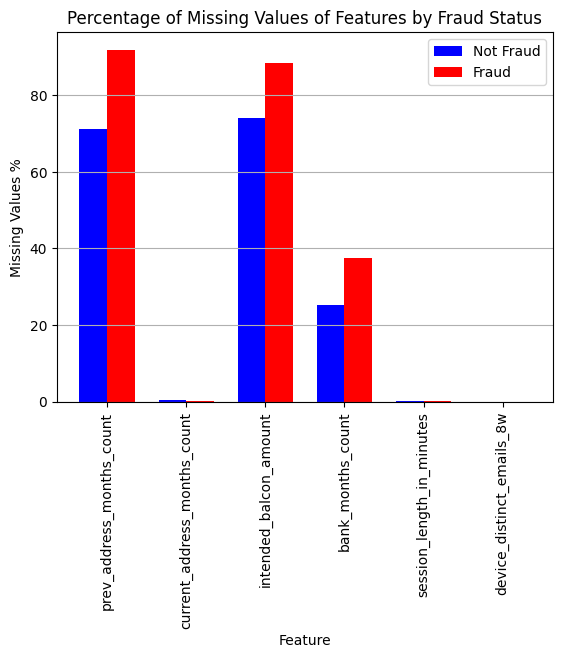

In [12]:
# Bar plots of percentage of missing values for each feature for fraud and non-fraud cases
pos = np.arange(len(missing_features))
bar_width = 0.35
mask = missing_vals_df['fraud_bool'] == 1

plt.bar(pos, missing_vals_df[~mask]['missing_percentage'], bar_width, color='blue', label='Not Fraud')
plt.bar(pos + bar_width, missing_vals_df[mask]['missing_percentage'], bar_width, color='red', label='Fraud')

plt.xticks(pos + bar_width / 2, missing_features, rotation=90)
plt.xlabel("Feature")
plt.ylabel("Missing Values %")
plt.title("Percentage of Missing Values of Features by Fraud Status")
plt.legend()
plt.grid(axis='y')

plt.show()

In [13]:
# correlation of features to drop with fraud status
features_to_drop = ['prev_address_months_count', 'intended_balcon_amount', 'bank_months_count']
df[features_to_drop + ['fraud_bool']].corr()['fraud_bool']

prev_address_months_count    0.020083
intended_balcon_amount       0.014884
bank_months_count            0.020929
fraud_bool                   1.000000
Name: fraud_bool, dtype: float64

I am dropping the features with a high percentage of missing values. This seems viable as they also have very weak correlation with fraud status.

In [14]:
# Drop features with a high percentage of missing values
no_missing_df = df.drop(features_to_drop, axis=1)

'current_address_months_count', 'session_length_in_minutes' and device_distinct_emails_8w have a very small percentage of missing values, so dropping their rows with missing values seems viable

In [15]:
# Drop rows with missing values
no_missing_df.dropna(inplace=True)

In [16]:
# Check for any remaining missing values
no_missing_df.isnull().values.any()

False

In [17]:
# Check shape of dataframe after handling missing values
print(f"Original shape: {df.shape}")
print(f"Shape after handling missing values: {no_missing_df.shape}")
print(f"Original shape, No Fraud: {df[df['fraud_bool'] == 0].shape}")
print(f"Shape after handling missing values, No Fraud: {no_missing_df[no_missing_df['fraud_bool'] == 0].shape}")
print(f"Original shape, Fraud: {df[df['fraud_bool'] == 1].shape}")
print(f"Shape after handling missing values, Fraud: {no_missing_df[no_missing_df['fraud_bool'] == 1].shape}")

Original shape: (1000000, 31)
Shape after handling missing values: (993607, 28)
Original shape, No Fraud: (988971, 31)
Shape after handling missing values, No Fraud: (982612, 28)
Original shape, Fraud: (11029, 31)
Shape after handling missing values, Fraud: (10995, 28)


In [18]:
no_missing_df.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               992483
current_address_months_count           422
customer_age                             9
days_since_request                  983056
payment_type                             5
zip_count_4w                          6305
velocity_6h                         992308
velocity_24h                        992561
velocity_4w                         991941
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
has_other_cards                          2
proposed_credit_limit                   12
foreign_request                          2
source                                   2
session_len

### **Distributions of Numerical Features**

In [19]:
# I am counting 'income' and 'customer_age' as numeric features
numeric_features = [feature for feature in no_missing_df.columns if no_missing_df[feature].nunique() >= 9]
numeric_features

['income',
 'name_email_similarity',
 'current_address_months_count',
 'customer_age',
 'days_since_request',
 'zip_count_4w',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'bank_branch_count_8w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'proposed_credit_limit',
 'session_length_in_minutes']

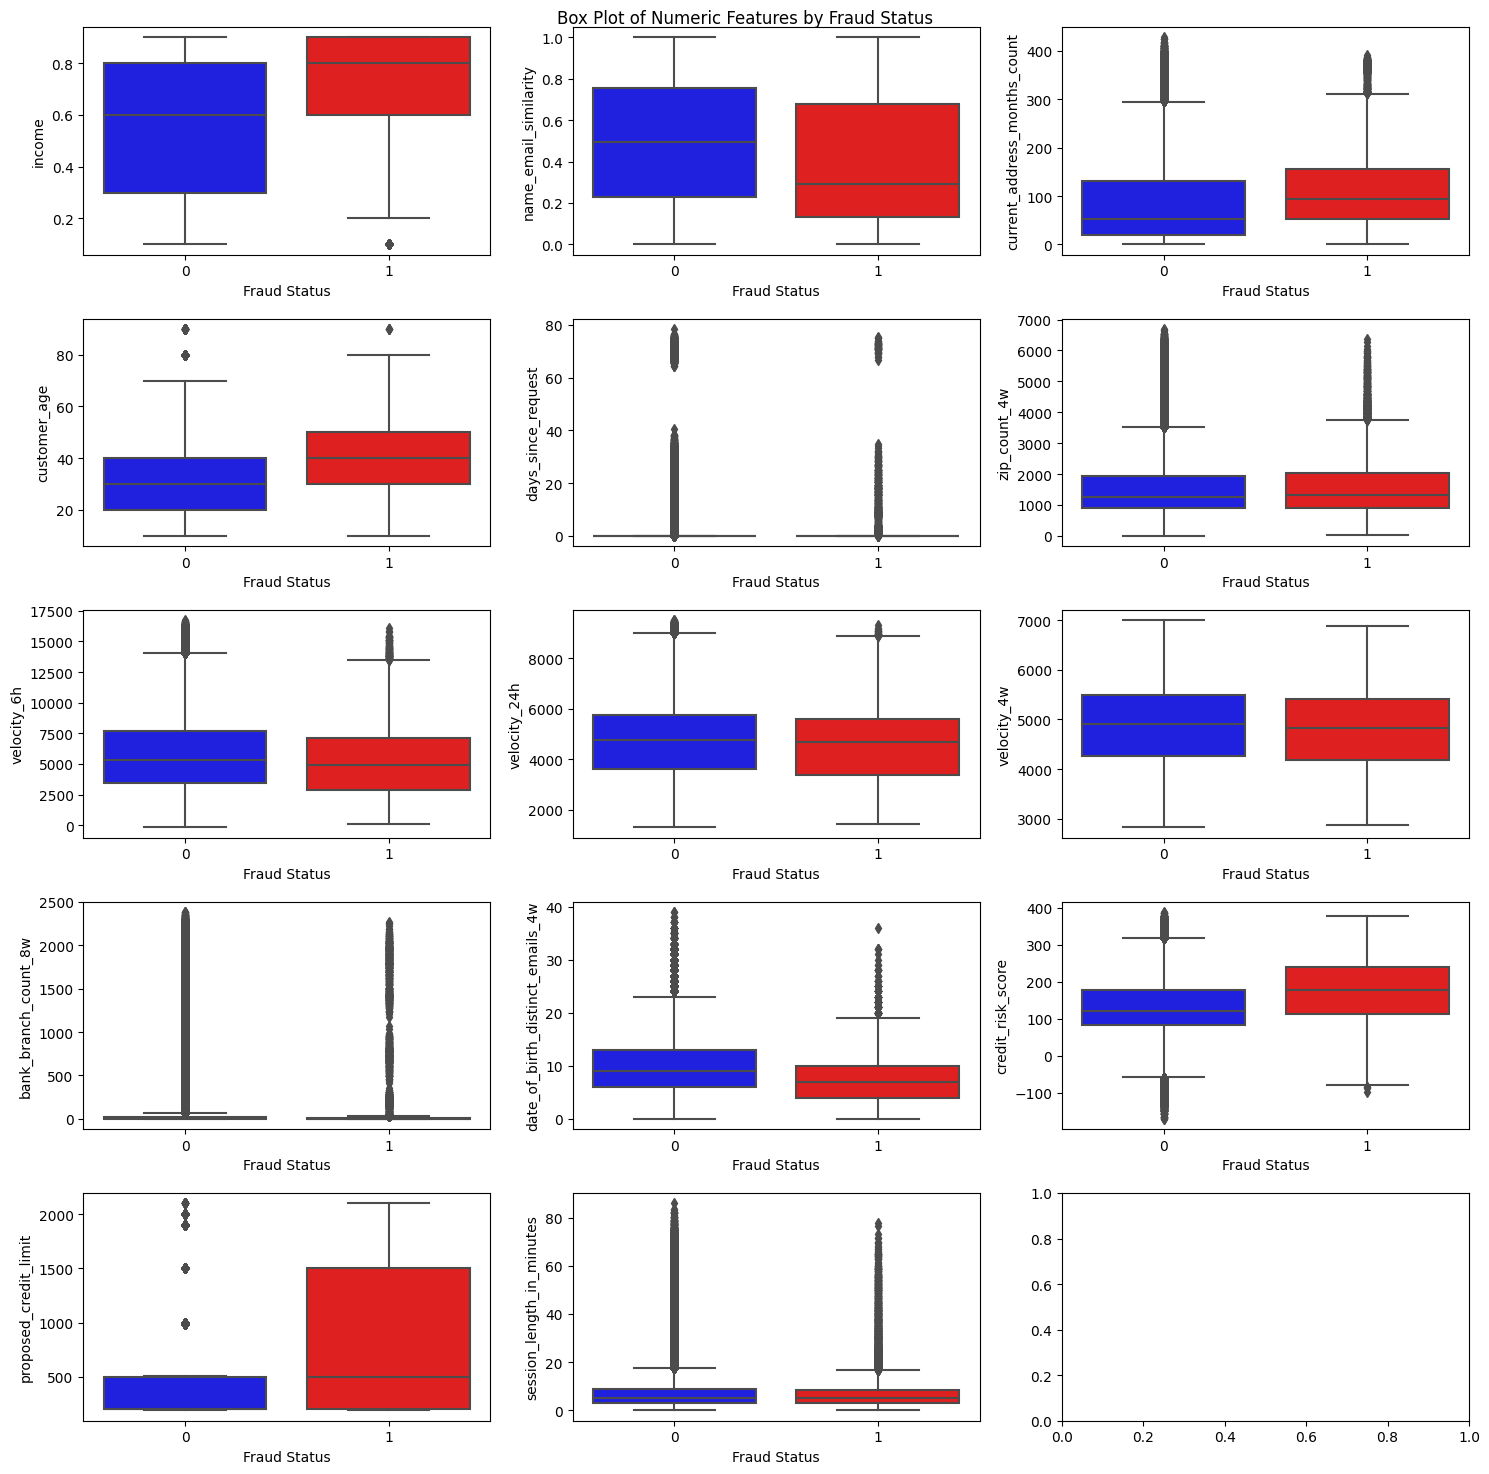

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# Box plot for each numeric feature
fig.suptitle("Box Plot of Numeric Features by Fraud Status")
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3, i % 3]
    sns.boxplot(x='fraud_bool', y=feature, data=no_missing_df, ax=ax, palette=['blue', 'red'])
    ax.set_xlabel("Fraud Status")
    ax.set_ylabel(feature)

plt.tight_layout()
plt.show()

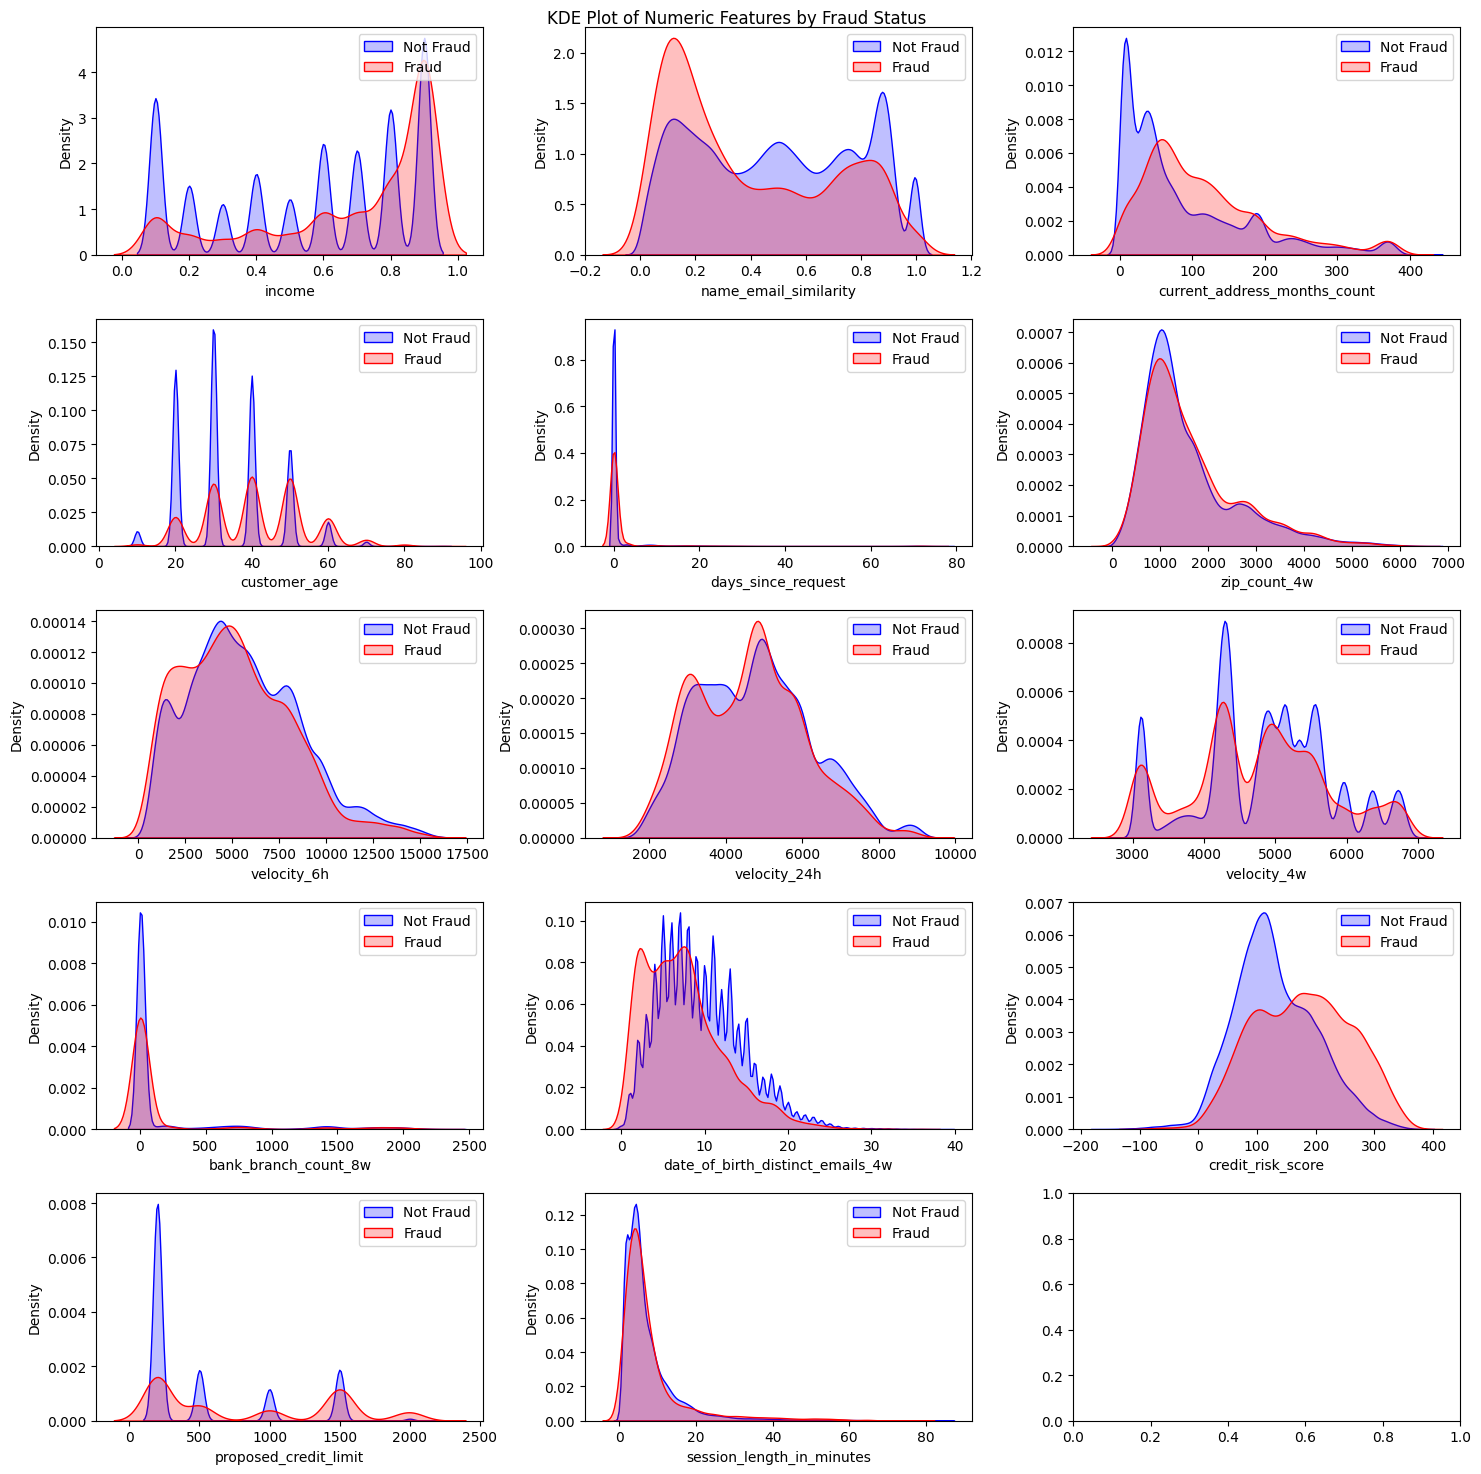

In [21]:
# Distribution of numeric features for fraud and non-fraud cases
warnings.filterwarnings("ignore", "use_inf_as_na")

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))

# KDE plot for each numeric feature
fig.suptitle("KDE Plot of Numeric Features by Fraud Status")
for i, feature in enumerate(numeric_features):
    ax = axes[i // 3, i % 3]
    sns.kdeplot(no_missing_df[no_missing_df['fraud_bool'] == 0][feature], ax=ax, color='blue', fill=True, label='Not Fraud', legend=True)
    sns.kdeplot(no_missing_df[no_missing_df['fraud_bool'] == 1][feature], ax=ax, color='red', fill=True, label='Fraud', legend=True)
    ax.set_xlabel(feature)
    ax.set_ylabel("Density")
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Positive values of skewness means right-skewed and negative means left-skewed. Some of the numerical features are highly right-skewed, affirming the KDE plots above.

In [22]:
skewness = no_missing_df[numeric_features].skew().sort_values(key=abs, ascending=False)
skewness

days_since_request                  9.313890
session_length_in_minutes           3.310582
bank_branch_count_8w                2.742046
zip_count_4w                        1.456994
current_address_months_count        1.384023
proposed_credit_limit               1.299190
date_of_birth_distinct_emails_4w    0.704295
velocity_6h                         0.561786
customer_age                        0.475504
income                             -0.386772
velocity_24h                        0.331072
credit_risk_score                   0.294942
velocity_4w                        -0.059498
name_email_similarity               0.041561
dtype: float64

I am using a skewness threshold magnitude of 1. There are no highly left-skewed features.

In [23]:
# Highly skewed numeric features
SKEW_THRESHOLD = 1
skewed_numeric_features = list(skewness[skewness > SKEW_THRESHOLD].index)
skewed_numeric_features

['days_since_request',
 'session_length_in_minutes',
 'bank_branch_count_8w',
 'zip_count_4w',
 'current_address_months_count',
 'proposed_credit_limit']

In [24]:
non_skewed_numeric_features = list(skewness[skewness <= SKEW_THRESHOLD].index)

### **Handling Categorical Features**

In [25]:
# Only features with String data type need to be encoded
encoded_features = [feature for feature in no_missing_df.columns if no_missing_df[feature].dtype == 'object']
encoded_features

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [26]:
# Dummy encoding
# Very similar to one-hot encoding, but the first encoded column is dropped to
# reduce correlation between encoded columns
encoded_df = pd.get_dummies(no_missing_df, columns=encoded_features, drop_first=True)

In [27]:
## new df hass 44 col after one hot encoding
new_df = pd.DataFrame(encoded_df)
new_df.head()

,fraud_bool,income,name_email_similarity,current_address_months_count,customer_age,days_since_request,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0,0.3,0.986506,25.0,40,0.006735,1059,13096.035018,7850.955007,6742.080561,...,True,False,False,False,False,False,False,False,False,False
1,0,0.8,0.617426,89.0,20,0.010095,1658,9223.283431,5745.251481,5941.664859,...,True,False,False,False,False,False,False,True,False,False
2,0,0.8,0.996707,14.0,40,0.012316,1095,4471.472149,5471.988958,5992.555113,...,True,False,False,False,False,False,False,False,True,False
3,0,0.6,0.475100,14.0,30,0.006991,3483,14431.993621,6755.344479,5970.336831,...,True,False,False,False,False,False,False,False,False,False
4,0,0.9,0.842307,29.0,40,5.742626,2339,7601.511579,5124.046930,5940.734212,...,True,False,False,False,False,False,False,True,False,False


In [28]:
# Separate the feature matrix and target variable
X = new_df.drop(['fraud_bool'], axis=1).reset_index(drop=True)
y = new_df['fraud_bool'].reset_index(drop=True)

### **Feature Scaling**

We are exploring 3 approaches:
1. Log transformation
2. Min-max scaling
3. Log transformation -> Min-max scaling

#### Logarithmic Transformation

In [29]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [30]:
# Apply log transfomation on highly skewed numeric features
log_transformer = FunctionTransformer(np.log1p, validate=True, feature_names_out='one-to-one')
log_preprocessor = ColumnTransformer([('log', log_transformer, skewed_numeric_features)], remainder='passthrough')

In [31]:
# temp_X = X.fillna(0)
# X_scaled_log = log_preprocessor.fit_transform(temp_X)

In [32]:
# Fit log transformation
X_scaled_log = log_preprocessor.fit_transform(X)

In [33]:
# Get the names of the features after pre-processing
log_feature_names = log_preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
log_feature_names = [feature.replace('remainder__', '') for feature in log_feature_names]
log_feature_names

['log__days_since_request',
 'log__session_length_in_minutes',
 'log__bank_branch_count_8w',
 'log__zip_count_4w',
 'log__current_address_months_count',
 'log__proposed_credit_limit',
 'income',
 'name_email_similarity',
 'customer_age',
 'velocity_6h',
 'velocity_24h',
 'velocity_4w',
 'date_of_birth_distinct_emails_4w',
 'credit_risk_score',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'has_other_cards',
 'foreign_request',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'month',
 'payment_type_AB',
 'payment_type_AC',
 'payment_type_AD',
 'payment_type_AE',
 'employment_status_CB',
 'employment_status_CC',
 'employment_status_CD',
 'employment_status_CE',
 'employment_status_CF',
 'employment_status_CG',
 'housing_status_BB',
 'housing_status_BC',
 'housing_status_BD',
 'housing_status_BE',
 'housing_status_BF',
 'housing_status_BG',
 'source_TELEAPP',
 'device_os_macintosh',
 'device_os_other',
 'device_os_windows',
 'device_os_x11']

In [34]:
# Convert the scaled training and testing sets to pandas DataFrames
X_scaled_log = pd.DataFrame(X_scaled_log, columns=log_feature_names)
X_scaled_log.head(10)

,log__days_since_request,log__session_length_in_minutes,log__bank_branch_count_8w,log__zip_count_4w,log__current_address_months_count,log__proposed_credit_limit,income,name_email_similarity,customer_age,velocity_6h,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.006713,2.846353,1.791759,6.966024,3.258097,7.313887,0.3,0.986506,40,13096.035018,...,True,False,False,False,False,False,False,False,False,False
1,0.010044,1.473356,1.386294,7.41397,4.49981,7.313887,0.8,0.617426,20,9223.283431,...,True,False,False,False,False,False,False,True,False,False
2,0.012241,3.166764,2.772589,6.999422,2.70805,5.303305,0.8,0.996707,40,4471.472149,...,True,False,False,False,False,False,False,False,True,False
3,0.006967,2.785987,2.484907,8.155936,2.70805,5.303305,0.6,0.4751,30,14431.993621,...,True,False,False,False,False,False,False,False,False,False
4,1.908449,1.55668,0.693147,7.757906,3.401197,5.303305,0.9,0.842307,40,7601.511579,...,True,False,False,False,False,False,False,True,False,False
5,0.023943,2.077855,6.559615,7.094235,5.913503,5.303305,0.6,0.29484,30,11556.955514,...,False,False,True,False,False,False,False,False,False,False
6,0.006896,3.374166,3.367296,7.600402,1.609438,5.303305,0.2,0.773085,40,11723.993606,...,True,False,False,False,False,False,False,False,False,True
7,0.044133,2.504241,1.94591,7.345365,4.644391,5.303305,0.8,0.15388,40,4999.555801,...,False,False,True,False,False,False,False,True,False,False
8,0.0346,1.845203,1.098612,7.485492,1.098612,5.303305,0.3,0.523655,30,6979.994002,...,True,False,False,False,False,False,False,True,False,False
9,0.017098,1.630019,2.70805,8.043663,4.905275,7.313887,0.8,0.834475,20,7549.992086,...,False,True,False,False,False,False,False,True,False,False


In [35]:
log_df = pd.concat([X_scaled_log, y], axis=1)
log_df.shape

(993607, 44)

In [36]:
prefixed_log_features = list(map(lambda x: 'log__' + x, skewed_numeric_features))

#### Min-Max Scaling (Normalization)

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
# Apply min-max scaling numeric features
minmax_transformer = MinMaxScaler()
minmax_preprocessor = ColumnTransformer([('minmax', minmax_transformer, numeric_features)], remainder='passthrough')

In [39]:
# Fit min-max scaler
X_scaled_minmax = minmax_preprocessor.fit_transform(X)

In [40]:
# Get the names of the features after pre-processing
minmax_feature_names = minmax_preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
minmax_feature_names = [feature.replace('remainder__', '') for feature in minmax_feature_names]
minmax_feature_names

['minmax__income',
 'minmax__name_email_similarity',
 'minmax__current_address_months_count',
 'minmax__customer_age',
 'minmax__days_since_request',
 'minmax__zip_count_4w',
 'minmax__velocity_6h',
 'minmax__velocity_24h',
 'minmax__velocity_4w',
 'minmax__bank_branch_count_8w',
 'minmax__date_of_birth_distinct_emails_4w',
 'minmax__credit_risk_score',
 'minmax__proposed_credit_limit',
 'minmax__session_length_in_minutes',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'has_other_cards',
 'foreign_request',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'month',
 'payment_type_AB',
 'payment_type_AC',
 'payment_type_AD',
 'payment_type_AE',
 'employment_status_CB',
 'employment_status_CC',
 'employment_status_CD',
 'employment_status_CE',
 'employment_status_CF',
 'employment_status_CG',
 'housing_status_BB',
 'housing_status_BC',
 'housing_status_BD',
 'housing_status_BE',
 'housing_status_BF',
 'housing_status_BG',
 'source_TELEAPP',
 'device_os_macintosh',
 '

In [41]:
# Convert the scaled training and testing sets to pandas DataFrames
X_scaled_minmax = pd.DataFrame(X_scaled_minmax, columns=minmax_feature_names)
X_scaled_minmax.head(10)

,minmax__income,minmax__name_email_similarity,minmax__current_address_months_count,minmax__customer_age,minmax__days_since_request,minmax__zip_count_4w,minmax__velocity_6h,minmax__velocity_24h,minmax__velocity_4w,minmax__bank_branch_count_8w,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.25,0.986507,0.058411,0.375,0.000086,0.157934,0.785651,0.798218,0.93939,0.002096,...,True,False,False,False,False,False,False,False,False,False
1,0.875,0.617426,0.207944,0.125,0.000129,0.24735,0.556307,0.541631,0.747399,0.001258,...,True,False,False,False,False,False,False,True,False,False
2,0.875,0.996708,0.03271,0.375,0.000157,0.163308,0.274904,0.508333,0.759605,0.006289,...,True,False,False,False,False,False,False,False,True,False
3,0.625,0.4751,0.03271,0.25,0.000089,0.519779,0.864767,0.664714,0.754276,0.004612,...,True,False,False,False,False,False,False,False,False,False
4,1.0,0.842307,0.067757,0.375,0.073195,0.349007,0.460265,0.465935,0.747175,0.000419,...,True,False,False,False,False,False,False,True,False,False
5,0.625,0.29484,0.86215,0.25,0.000309,0.179579,0.694507,0.7563,0.877228,0.295597,...,False,False,True,False,False,False,False,False,False,False
6,0.125,0.773086,0.009346,0.375,0.000088,0.298104,0.704399,0.799841,0.842657,0.01174,...,True,False,False,False,False,False,False,False,False,True
7,0.875,0.153879,0.240654,0.375,0.000575,0.23093,0.306177,0.393166,0.863763,0.002516,...,False,False,True,False,False,False,False,True,False,False
8,0.25,0.523654,0.004673,0.25,0.000449,0.265711,0.423459,0.369871,0.911297,0.000839,...,True,False,False,False,False,False,False,True,False,False
9,0.875,0.834475,0.313084,0.125,0.00022,0.464547,0.457214,0.606051,0.836469,0.00587,...,False,True,False,False,False,False,False,True,False,False


In [42]:
minmax_df = pd.concat([X_scaled_minmax, y], axis=1)
minmax_df.shape

(993607, 44)

In [43]:
prefixed_minmax_features = list(map(lambda x: 'minmax__' + x, numeric_features))

### Logarithmic Transformation -> Min-Max Scaling

In [44]:
minmax_transformer = MinMaxScaler()
minmax_preprocessor = ColumnTransformer([('minmax', minmax_transformer, prefixed_log_features + non_skewed_numeric_features)], remainder='passthrough')

In [45]:
X_scaled_log_minmax = minmax_preprocessor.fit_transform(X_scaled_log)

In [46]:
# Get the names of the features after pre-processing
log_minmax_feature_names = minmax_preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
log_minmax_feature_names = [feature.replace('remainder__', '') for feature in log_minmax_feature_names]
log_minmax_feature_names

['minmax__log__days_since_request',
 'minmax__log__session_length_in_minutes',
 'minmax__log__bank_branch_count_8w',
 'minmax__log__zip_count_4w',
 'minmax__log__current_address_months_count',
 'minmax__log__proposed_credit_limit',
 'minmax__date_of_birth_distinct_emails_4w',
 'minmax__velocity_6h',
 'minmax__customer_age',
 'minmax__income',
 'minmax__velocity_24h',
 'minmax__credit_risk_score',
 'minmax__velocity_4w',
 'minmax__name_email_similarity',
 'email_is_free',
 'phone_home_valid',
 'phone_mobile_valid',
 'has_other_cards',
 'foreign_request',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'month',
 'payment_type_AB',
 'payment_type_AC',
 'payment_type_AD',
 'payment_type_AE',
 'employment_status_CB',
 'employment_status_CC',
 'employment_status_CD',
 'employment_status_CE',
 'employment_status_CF',
 'employment_status_CG',
 'housing_status_BB',
 'housing_status_BC',
 'housing_status_BD',
 'housing_status_BE',
 'housing_status_BF',
 'housing_status_BG',
 'source_TELEAP

In [47]:
# Convert the scaled training and testing sets to pandas DataFrames
X_scaled_log_minmax = pd.DataFrame(X_scaled_log_minmax, columns=log_minmax_feature_names)
X_scaled_log_minmax.head(10)

,minmax__log__days_since_request,minmax__log__session_length_in_minutes,minmax__log__bank_branch_count_8w,minmax__log__zip_count_4w,minmax__log__current_address_months_count,minmax__log__proposed_credit_limit,minmax__date_of_birth_distinct_emails_4w,minmax__velocity_6h,minmax__customer_age,minmax__income,...,housing_status_BC,housing_status_BD,housing_status_BE,housing_status_BF,housing_status_BG,source_TELEAPP,device_os_macintosh,device_os_other,device_os_windows,device_os_x11
0,0.001534,0.637446,0.230381,0.77282,0.53751,0.85976,0.128205,0.785651,0.375,0.25,...,True,False,False,False,False,False,False,False,False,False
1,0.002296,0.329867,0.178247,0.828007,0.742364,0.85976,0.461538,0.556307,0.125,0.875,...,True,False,False,False,False,False,False,True,False,False
2,0.002798,0.709225,0.356494,0.776935,0.446766,0.021282,0.282051,0.274904,0.375,0.875,...,True,False,False,False,False,False,False,False,True,False
3,0.001592,0.623923,0.319505,0.919418,0.446766,0.021282,0.333333,0.864767,0.25,0.625,...,True,False,False,False,False,False,False,False,False,False
4,0.436196,0.348533,0.089124,0.87038,0.561119,0.021282,0.153846,0.460265,0.375,1.0,...,True,False,False,False,False,False,False,True,False,False
5,0.005472,0.465287,0.843423,0.788616,0.975591,0.021282,0.128205,0.694507,0.25,0.625,...,False,False,True,False,False,False,False,False,False,False
6,0.001576,0.755687,0.432961,0.850976,0.26552,0.021282,0.205128,0.704399,0.375,0.125,...,True,False,False,False,False,False,False,False,False,True
7,0.010087,0.560806,0.250201,0.819555,0.766217,0.021282,0.179487,0.306177,0.375,0.875,...,False,False,True,False,False,False,False,True,False,False
8,0.007908,0.413168,0.141257,0.836819,0.181246,0.021282,0.25641,0.423459,0.25,0.25,...,True,False,False,False,False,False,False,True,False,False
9,0.003908,0.364962,0.348196,0.905586,0.809257,0.85976,0.512821,0.457214,0.125,0.875,...,False,True,False,False,False,False,False,True,False,False


In [48]:
log_minmax_df = pd.concat([X_scaled_log_minmax, y], axis=1)
log_minmax_df.shape

(993607, 44)

In [49]:
prefixed_log_minmax_features = [x for x in log_minmax_feature_names if x not in encoded_df.columns]

## Resampling for effective sampling 

In [50]:
# # Import the necessary libraries for undersampling imbalanced datasets
# from imblearn.under_sampling import NearMiss
# from collections import Counter

In [51]:
# print(f'Test dataset samples per class {Counter(y)}')
# X_scaled.fillna(0, inplace=True)

# # Define the NearMiss undersampling object with a sampling strategy of 1 and all available CPU cores
# nm = NearMiss(sampling_strategy=1, n_jobs=-1)

# # Perform NearMiss undersampling on the feature matrix X and target variable y
# X_scaled_nm, y_scaled_nm = nm.fit_resample(X_scaled, y)

# # Print the number of occurrences of each class in the resampled dataset
# print('Resampled dataset shape %s' % Counter(y_scaled_nm))

### **Multicollinearity**

In [52]:
# Correlation matrices
unscaled_corr_matrix = encoded_df.corr()
log_corr_matrix = log_df.corr()
minmax_corr_matrix = minmax_df.corr()
log_minmax_corr_matrix = log_minmax_df.corr()

In [53]:
# Function to check for features with strong correlation
def correlation_pairs(corr_matrix, threshold):
    corr_matrix = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(bool))
    corr_pairs = corr_matrix.unstack().sort_values(key=lambda x: abs(x), ascending=False)
    return corr_pairs[abs(corr_pairs) > threshold]

CORR_THRESHOLD = 0.5

In [54]:
correlation_pairs(unscaled_corr_matrix, CORR_THRESHOLD)

month                  velocity_4w         -0.848063
proposed_credit_limit  credit_risk_score    0.606280
month                  velocity_24h        -0.549868
velocity_4w            velocity_24h         0.538984
dtype: float64

In [55]:
correlation_pairs(log_corr_matrix, CORR_THRESHOLD)

month              velocity_4w                  -0.848063
credit_risk_score  log__proposed_credit_limit    0.632222
month              velocity_24h                 -0.549868
payment_type_AC    log__bank_branch_count_8w    -0.540865
velocity_4w        velocity_24h                  0.538984
dtype: float64

In [56]:
correlation_pairs(minmax_corr_matrix, CORR_THRESHOLD)

month                          minmax__velocity_4w         -0.848063
minmax__proposed_credit_limit  minmax__credit_risk_score    0.606280
month                          minmax__velocity_24h        -0.549868
minmax__velocity_4w            minmax__velocity_24h         0.538984
dtype: float64

In [57]:
correlation_pairs(log_minmax_corr_matrix, CORR_THRESHOLD)

month                      minmax__velocity_4w                  -0.848063
minmax__credit_risk_score  minmax__log__proposed_credit_limit    0.632222
month                      minmax__velocity_24h                 -0.549868
payment_type_AC            minmax__log__bank_branch_count_8w    -0.540865
minmax__velocity_4w        minmax__velocity_24h                  0.538984
dtype: float64

Min-Max scaling has no impact on correlation between features. Log transformation affects correlation between features but it appears to be insignificant.

There is strong negative correlation between 'month' and 'velocity_4w'. Correlation between other features are in the acceptable range.

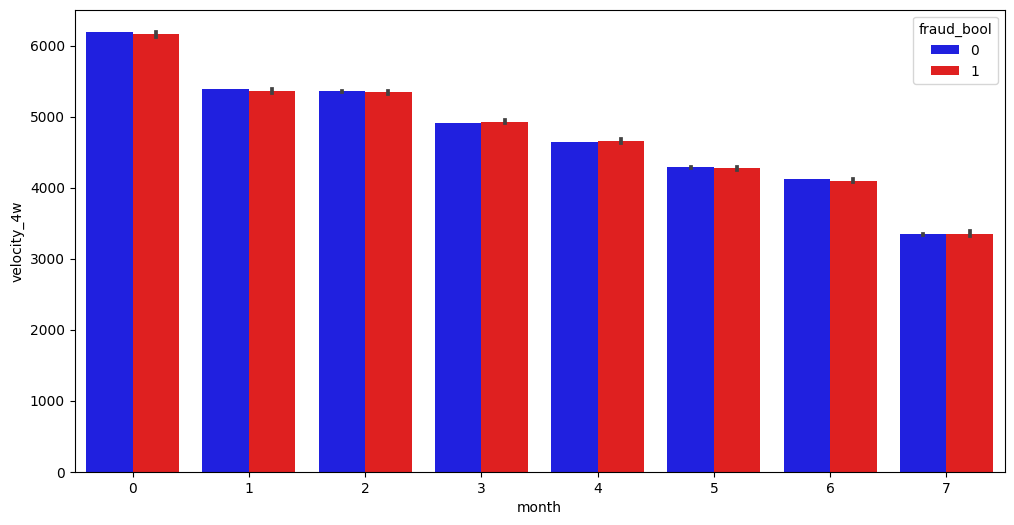

In [58]:
# Plot 'velocity_4w' and against 'month'
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='velocity_4w', hue='fraud_bool', data=encoded_df, palette=['blue', 'red'])
plt.xlabel("month")
plt.ylabel("velocity_4w")
plt.show()

### **Feature Importances**

#### Correlation with fraud status

In [59]:
# Find features with strong correlation with target variable 'fraud_bool'
unscaled_corr_with_target = unscaled_corr_matrix['fraud_bool'].sort_values(key=lambda x: abs(x), ascending=False)
unscaled_corr_with_target = unscaled_corr_with_target.drop('fraud_bool')
unscaled_corr_with_target

device_os_windows                   0.078392
credit_risk_score                   0.070668
proposed_credit_limit               0.068963
customer_age                        0.063022
keep_alive_session                 -0.050455
income                              0.045096
date_of_birth_distinct_emails_4w   -0.043288
device_distinct_emails_8w           0.037354
name_email_similarity              -0.036738
device_os_other                    -0.036551
housing_status_BC                  -0.035834
phone_home_valid                   -0.035277
has_other_cards                    -0.035241
current_address_months_count        0.033460
housing_status_BE                  -0.032966
payment_type_AC                     0.031739
housing_status_BB                  -0.028585
email_is_free                       0.027802
employment_status_CC                0.025996
employment_status_CF               -0.018744
velocity_6h                        -0.017018
foreign_request                     0.016989
employment

In [60]:
unscaled_corr_with_target[skewed_numeric_features]

days_since_request              0.000571
session_length_in_minutes       0.009040
bank_branch_count_8w           -0.011606
zip_count_4w                    0.005102
current_address_months_count    0.033460
proposed_credit_limit           0.068963
Name: fraud_bool, dtype: float64

In [61]:
# Find features with strong correlation with target variable 'fraud_bool'
log_corr_with_target = log_corr_matrix['fraud_bool'].sort_values(key=lambda x: abs(x), ascending=False)
log_corr_with_target = log_corr_with_target.drop('fraud_bool')
log_corr_with_target[prefixed_log_features]

log__days_since_request              0.001406
log__session_length_in_minutes       0.004964
log__bank_branch_count_8w           -0.028388
log__zip_count_4w                    0.006065
log__current_address_months_count    0.046533
log__proposed_credit_limit           0.060462
Name: fraud_bool, dtype: float64

In [62]:
unscaled_corr_with_target[numeric_features]

income                              0.045096
name_email_similarity              -0.036738
current_address_months_count        0.033460
customer_age                        0.063022
days_since_request                  0.000571
zip_count_4w                        0.005102
velocity_6h                        -0.017018
velocity_24h                       -0.011257
velocity_4w                        -0.011667
bank_branch_count_8w               -0.011606
date_of_birth_distinct_emails_4w   -0.043288
credit_risk_score                   0.070668
proposed_credit_limit               0.068963
session_length_in_minutes           0.009040
Name: fraud_bool, dtype: float64

In [63]:
# Find features with strong correlation with target variable 'fraud_bool'
minmax_corr_with_target = minmax_corr_matrix['fraud_bool'].sort_values(key=lambda x: abs(x), ascending=False)
minmax_corr_with_target = minmax_corr_with_target.drop('fraud_bool')
minmax_corr_with_target[prefixed_minmax_features]

minmax__income                              0.045096
minmax__name_email_similarity              -0.036738
minmax__current_address_months_count        0.033460
minmax__customer_age                        0.063022
minmax__days_since_request                  0.000571
minmax__zip_count_4w                        0.005102
minmax__velocity_6h                        -0.017018
minmax__velocity_24h                       -0.011257
minmax__velocity_4w                        -0.011667
minmax__bank_branch_count_8w               -0.011606
minmax__date_of_birth_distinct_emails_4w   -0.043288
minmax__credit_risk_score                   0.070668
minmax__proposed_credit_limit               0.068963
minmax__session_length_in_minutes           0.009040
Name: fraud_bool, dtype: float64

In [64]:
# Find features with strong correlation with target variable 'fraud_bool'
log_minmax_corr_with_target = log_minmax_corr_matrix['fraud_bool'].sort_values(key=lambda x: abs(x), ascending=False)
log_minmax_corr_with_target = log_minmax_corr_with_target.drop('fraud_bool')
log_minmax_corr_with_target[prefixed_log_minmax_features]

minmax__log__days_since_request              0.001406
minmax__log__session_length_in_minutes       0.004964
minmax__log__bank_branch_count_8w           -0.028388
minmax__log__zip_count_4w                    0.006065
minmax__log__current_address_months_count    0.046533
minmax__log__proposed_credit_limit           0.060462
minmax__date_of_birth_distinct_emails_4w    -0.043288
minmax__velocity_6h                         -0.017018
minmax__customer_age                         0.063022
minmax__income                               0.045096
minmax__velocity_24h                        -0.011257
minmax__credit_risk_score                    0.070668
minmax__velocity_4w                         -0.011667
minmax__name_email_similarity               -0.036738
Name: fraud_bool, dtype: float64

No feature seems to be highly correlated with fraud status regardless of the feature scaling method. Log transformation has minimal impact on correlation with fraud status, while min-max scaling has no impact.

#### Chi-square test for categorical features

In [65]:
categorical_features = [feature for feature in df.columns if feature not in numeric_features and feature != 'fraud_bool']
categorical_features

['prev_address_months_count',
 'intended_balcon_amount',
 'payment_type',
 'employment_status',
 'email_is_free',
 'housing_status',
 'phone_home_valid',
 'phone_mobile_valid',
 'bank_months_count',
 'has_other_cards',
 'foreign_request',
 'source',
 'device_os',
 'keep_alive_session',
 'device_distinct_emails_8w',
 'month']

In [66]:
categorical_df = encoded_df.drop(columns=numeric_features)
# # Temporarily drop missing values in 'device_distinct_emails_8w' for chi-squared test
# categorical_df = categorical_df[categorical_df['device_distinct_emails_8w'].notnull()]
X_categorical_df = categorical_df.drop(columns=['fraud_bool'])
y_categorical_df = categorical_df['fraud_bool']

In [67]:
chi2_results = chi2(X_categorical_df, y_categorical_df)
chi2_df = pd.DataFrame(chi2_results, columns=X_categorical_df.columns, index=['chi2-statistic', 'p-value']).transpose()
chi2_df = chi2_df.sort_values(by='chi2-statistic', ascending=False)

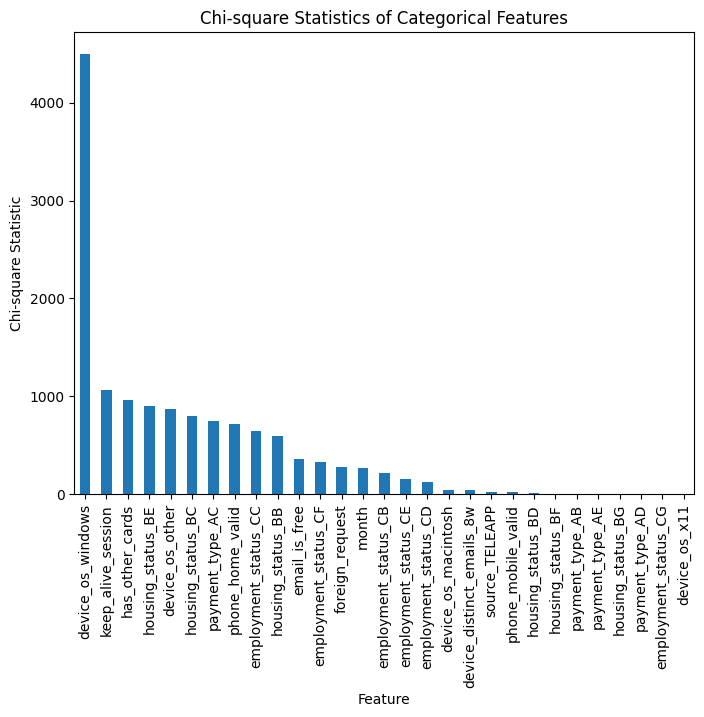

In [68]:
# Plot chi-square statistics
fig, ax = plt.subplots(figsize=(8, 6))
chi2_df['chi2-statistic'].plot(kind='bar', ax=ax)
ax.set_xlabel("Feature")
ax.set_ylabel("Chi-square Statistic")
ax.set_title("Chi-square Statistics of Categorical Features")
plt.show()

Chi-square test measures the independence between catgeorical features and the dependent variable. A higher chi-square statistic suggests strong influence of the feature on fraud status.

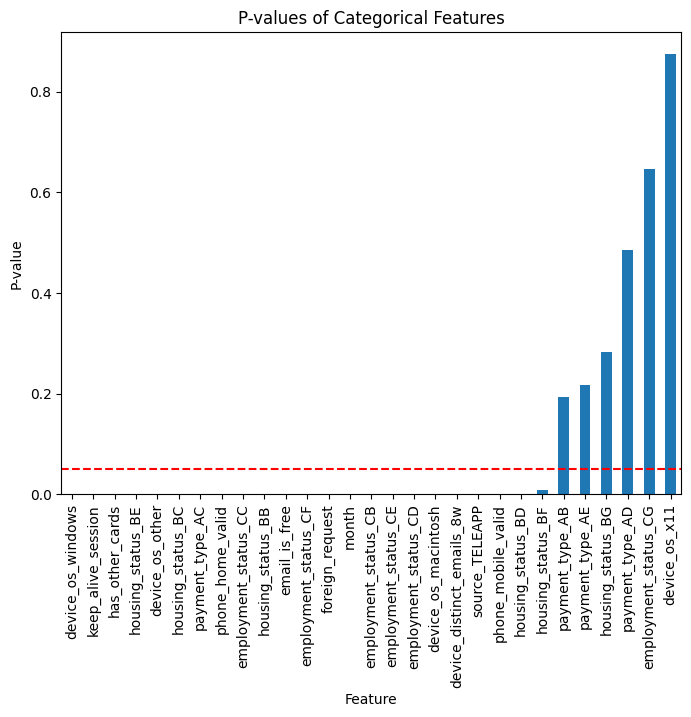

In [69]:
# Plot p-values
PVALUE_THRESHOLD = 0.05

fig, ax = plt.subplots(figsize=(8, 6))
chi2_df['p-value'].plot(kind='bar', ax=ax)
ax.set_xlabel("Feature")
ax.set_ylabel("P-value")
ax.set_title("P-values of Categorical Features")
plt.axhline(y=PVALUE_THRESHOLD, color='r', linestyle='--')
plt.show()

Categorical features with p-values above threshold of 0.05 can be considered for dropping as they are not considered to have a statistically significant relationship with fraud status.

#### Extra Trees Classifier for Feature Selection on unscaled dataset

In [70]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X, y)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled_minmax.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(len(best_extra_features))

15


In [71]:
extra_importances = pd.DataFrame({'feature': X.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

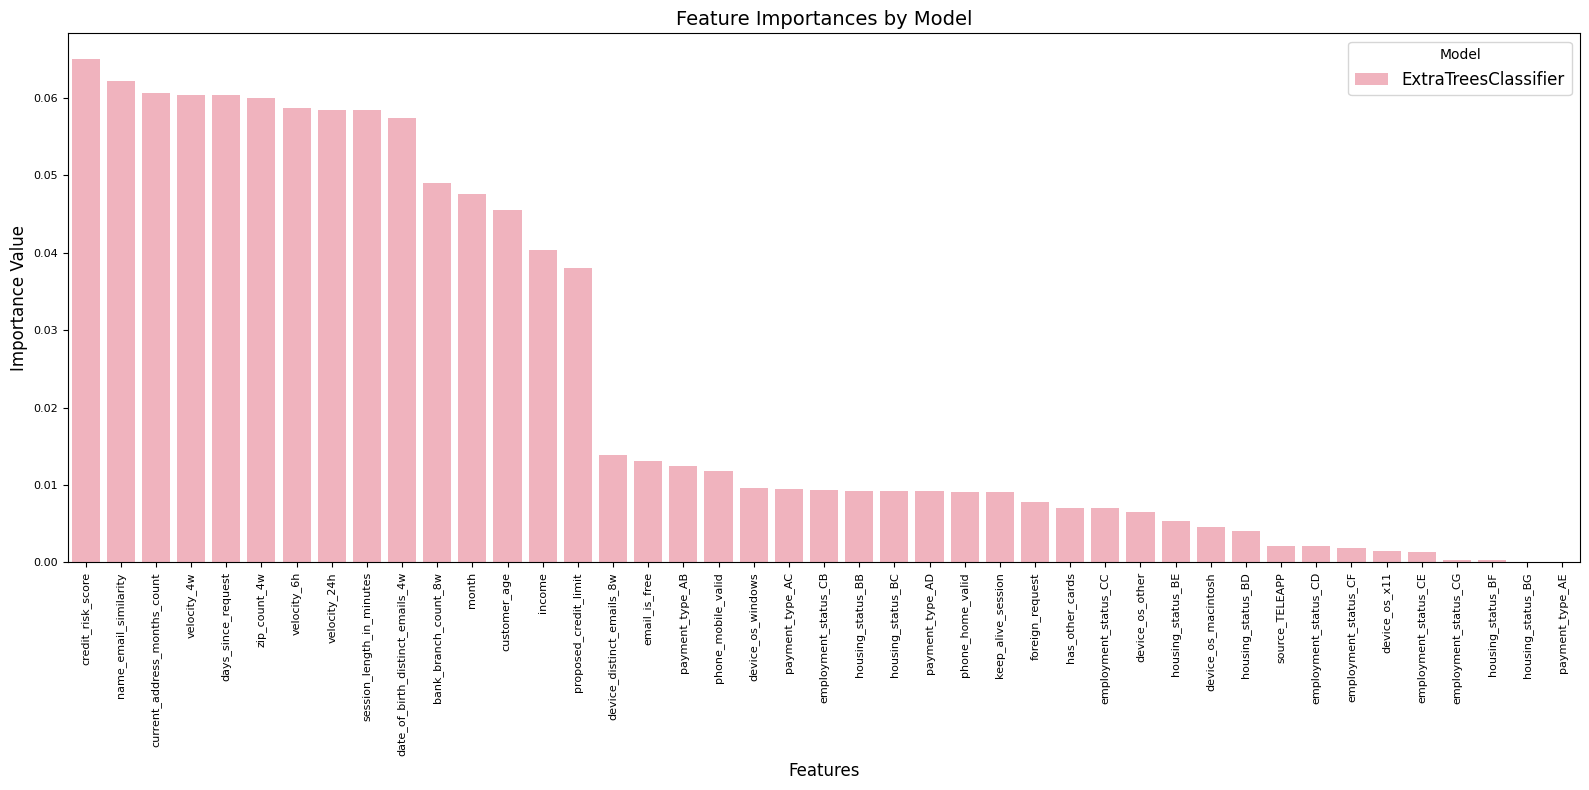

In [72]:
# Set up plot
plt.figure(figsize=(16, 8))

my_palette = sns.color_palette("husl", 2)
# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Extra Trees Classifier for Feature Selection on log dataset

In [73]:
# X_scaled_log = X_scaled_log[np.isfinite(X_scaled_log).all(1)]
# y_log = y[np.isfinite(X_scaled_log).all(1).index]
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_log, y)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled_log.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(len(best_extra_features))

15


In [74]:
extra_importances = pd.DataFrame({'feature': X_scaled_log.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

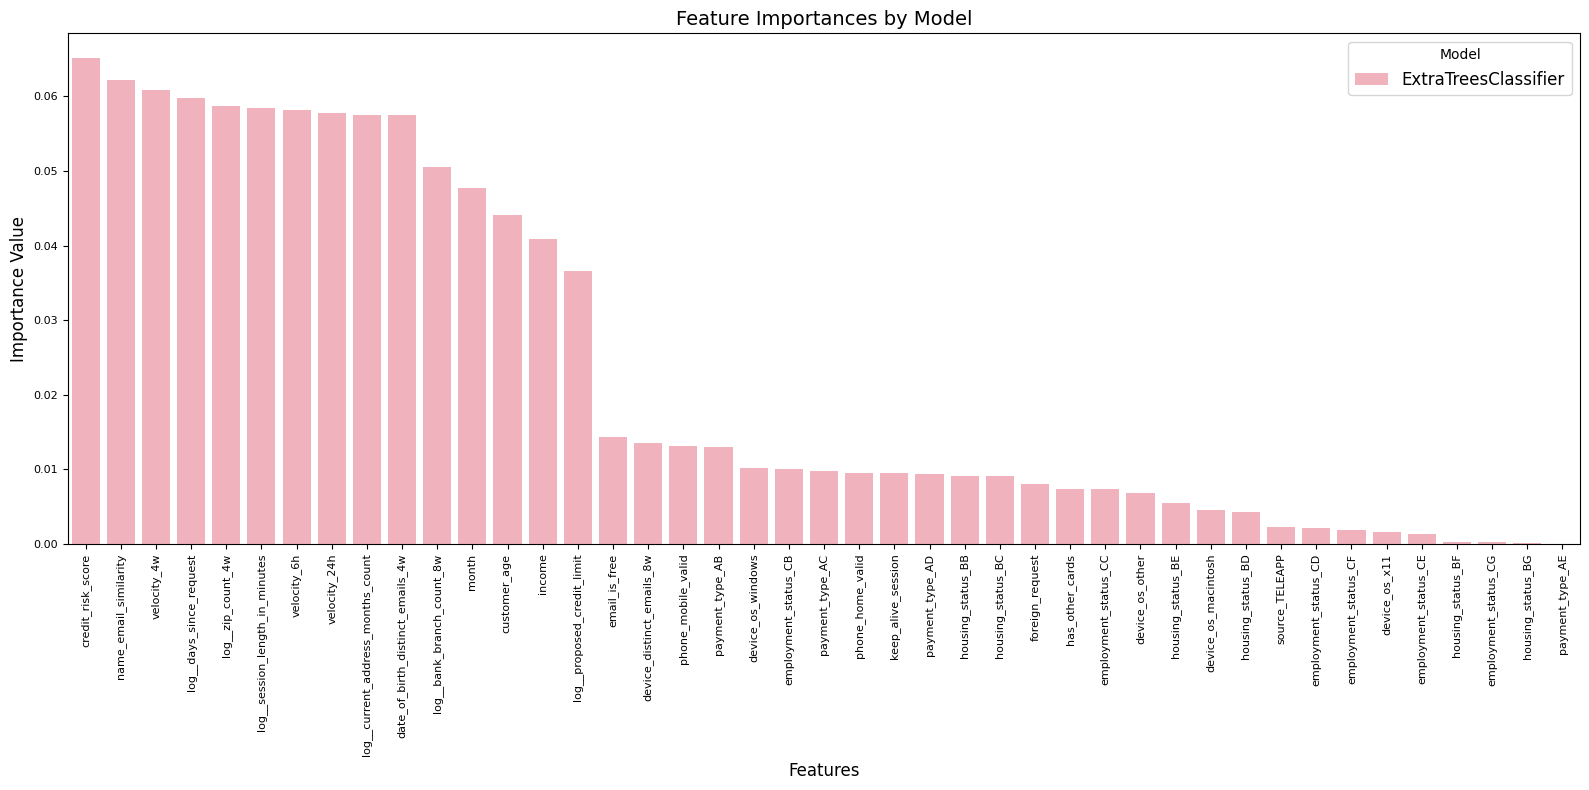

In [75]:
# Set up plot
plt.figure(figsize=(16, 8))

my_palette = sns.color_palette("husl", 2)
# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Extra Trees Classifier for Feature Importance on min max dataset

In [76]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_minmax, y)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled_minmax.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(len(best_extra_features))

15


In [77]:
extra_importances = pd.DataFrame({'feature': X_scaled_minmax.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

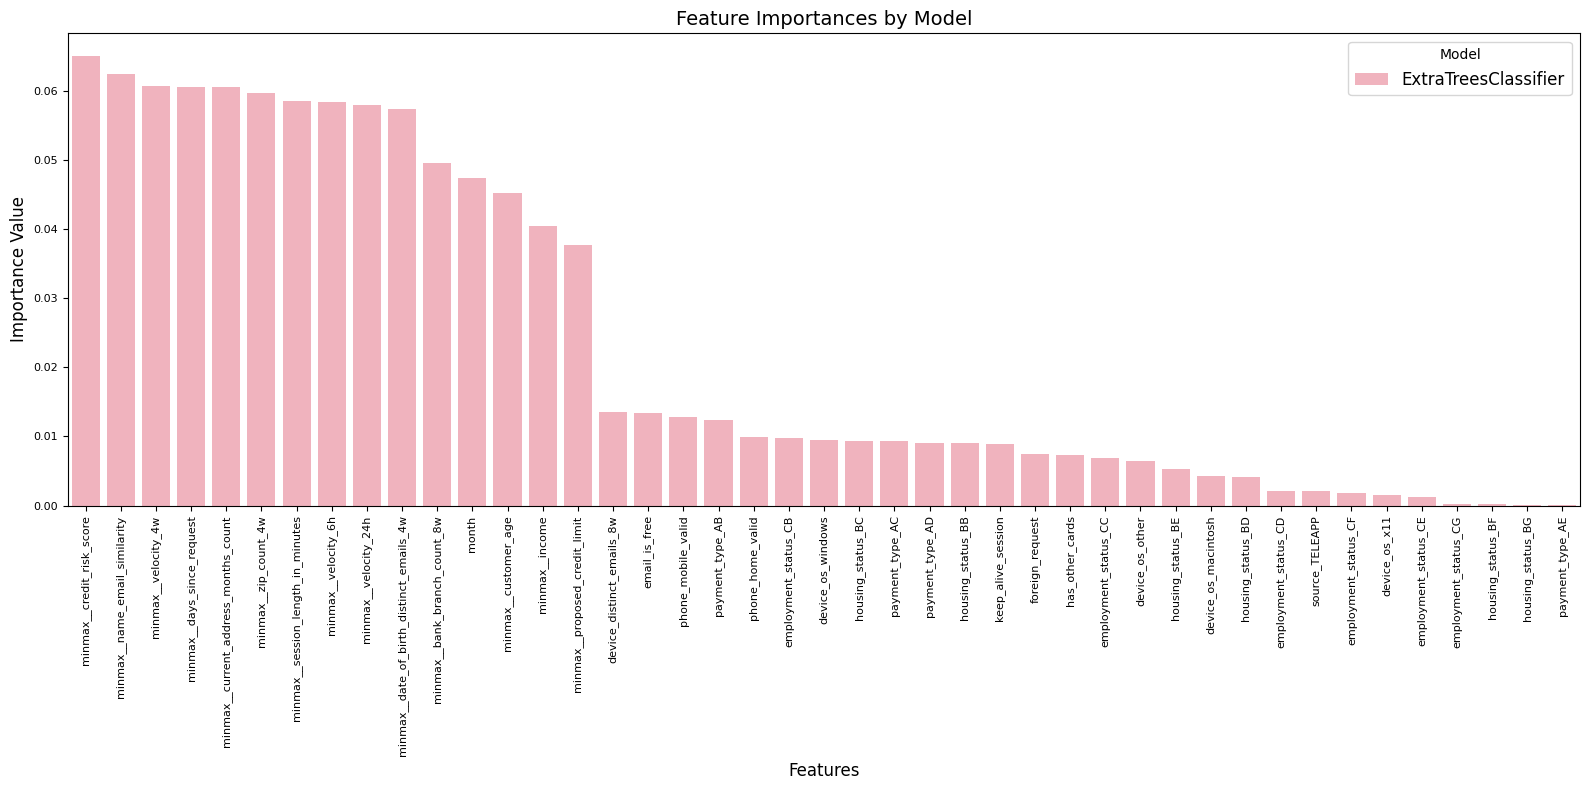

In [78]:
# Set up plot
plt.figure(figsize=(16, 8))

my_palette = sns.color_palette("husl", 2)
# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

#### Extra Trees Classifier for Feature Importance on log -> min max dataset

In [79]:
extra = ExtraTreesClassifier(n_estimators=50, random_state=0)
extra.fit(X_scaled_log_minmax, y)

# Create a SelectFromModel object with the fitted Random Forest model
feature_sel_extra = SelectFromModel(extra, prefit=True)

# Get the names of the selected features by calling .get_support() on the SelectFromModel object
best_extra_features = [X_scaled_log_minmax.columns[(feature_sel_extra.get_support())]]
best_extra_features = list(best_extra_features[0])

# Print the names of the selected features
print(len(best_extra_features))

15


In [80]:
extra_importances = pd.DataFrame({'feature': X_scaled_log_minmax.columns, 'importance': extra.feature_importances_, 'model': 'ExtraTreesClassifier'})

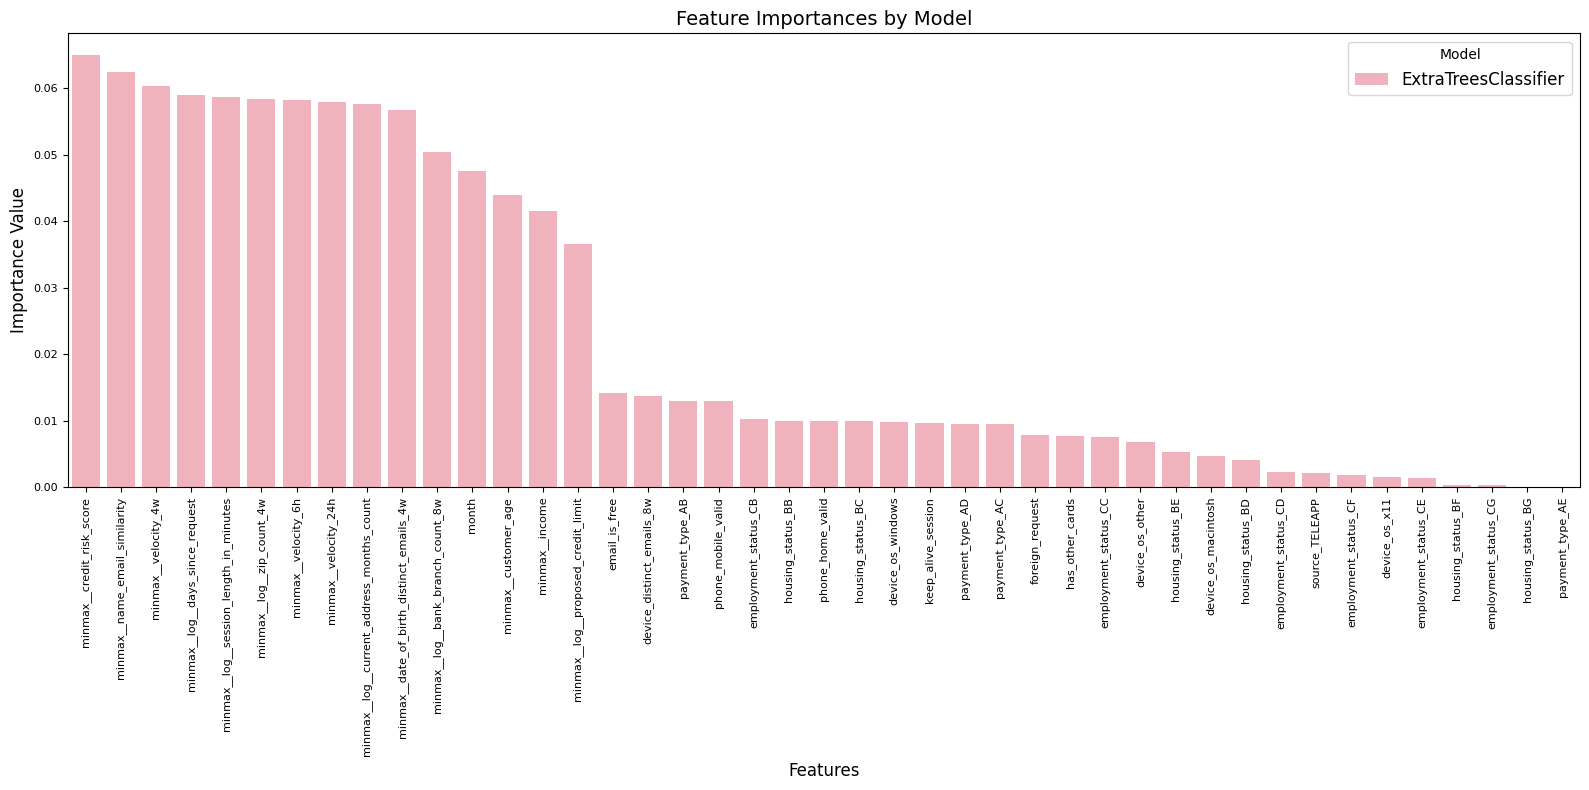

In [81]:
# Set up plot
plt.figure(figsize=(16, 8))

my_palette = sns.color_palette("husl", 2)
# Create grouped bar plot
sns.barplot(data=extra_importances.sort_values(by='importance', ascending=False), x="feature", y="importance", hue="model", palette=my_palette, alpha=.6)

# Customize labels and legend
plt.xlabel("Features", fontsize=12)
plt.ylabel("Importance Value", fontsize=12)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=8)
plt.title("Feature Importances by Model", fontsize=14)
plt.legend(title='Model', fontsize=12)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Feature importances of Extra Trees classifier do not appear to be significantly affected by scaling methods.

#### Logistic Regression for feature importances of numerical features

In [82]:
import statsmodels.api as sm

##### Unscaled data

In [83]:
dependent_variable = 'fraud_bool'
input_df = encoded_df[numeric_features + [dependent_variable]]

formula = f"{dependent_variable} ~ {' + '.join(numeric_features)}"

model = sm.GLM.from_formula(formula=formula, family=sm.families.Binomial(), data=input_df)

result = model.fit()

result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             fraud_bool   No. Observations:               993607
Model:                            GLM   Df Residuals:                   993592
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -54781.
Date:                Sun, 31 Mar 2024   Deviance:                   1.0956e+05
Time:                        01:39:56   Pearson chi2:                 1.08e+06
No. Iterations:                     9   Pseudo R-squ. (CS):            0.01135
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -6.5002      0.077    -84.784      0.000      -6.650      -6.350
income                               1.2058      0.040     30.431      0.000       1.128       1.283
name_email_similarity               -1.3424      0.035    -38.231      0.000      -1.411      -1.274
current_address_months_count         0.0015      0.000     14.686      0.000       0.001       0.002
customer_age                         0.0268      0.001     29.470      0.000       0.025       0.029
days_since_request                   0.0139      0.002      9.008      0.000       0.011       0.017
zip_count_4w                         0.0001   9.69e-06     14.917      0.000       0.000       0.000
velocity_6h                      -2.524e-05   3.79e-06     -6.663      0.000   -3.27e-05   -1.78e-05
velocity_24h                      6.995e-06   8.24e-06      0.849      0.396   -9.15e-06    2.31e-05
velocity_4w                      -5.166e-05   1.36e-05     -3.808      0.000   -7.83e-05   -2.51e-05
bank_branch_count_8w                -0.0004   2.59e-05    -13.882      0.000      -0.000      -0.000
date_of_birth_distinct_emails_4w    -0.0356      0.003    -13.963      0.000      -0.041      -0.031
credit_risk_score                    0.0048      0.000     26.596      0.000       0.004       0.005
proposed_credit_limit                0.0005   2.23e-05     23.702      0.000       0.000       0.001
session_length_in_minutes            0.0108      0.001     10.266      0.000       0.009       0.013
====================================================================================================
"""

In [84]:
significant_coeffs = result.pvalues[result.pvalues <= PVALUE_THRESHOLD].sort_values()

print("Significant Coefficients:")
print(significant_coeffs)

Significant Coefficients:
Intercept                            0.000000e+00
name_email_similarity                0.000000e+00
income                              2.135507e-203
customer_age                        6.922047e-191
credit_risk_score                   7.497406e-156
proposed_credit_limit               3.407271e-124
zip_count_4w                         2.548050e-50
current_address_months_count         7.902166e-49
date_of_birth_distinct_emails_4w     2.613463e-44
bank_branch_count_8w                 8.140981e-44
session_length_in_minutes            9.979415e-25
days_since_request                   2.090552e-19
velocity_6h                          2.676064e-11
velocity_4w                          1.401193e-04
dtype: float64


##### Logarithmic transformed data

In [85]:
dependent_variable = 'fraud_bool'
input_features = prefixed_log_features + non_skewed_numeric_features
input_df = log_df[input_features].astype('int64')
input_df[dependent_variable] = log_df[dependent_variable].astype('bool')

formula = f"{dependent_variable} ~ {' + '.join(input_features)}"

model = sm.GLM.from_formula(formula=formula, family=sm.families.Binomial(), data=input_df)

result = model.fit()

result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['fraud_bool[False]', 'fraud_bool[True]']   No. Observations:               993607
Model:                                                   GLM   Df Residuals:                   993594
Model Family:                                       Binomial   Df Model:                           12
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -55539.
Date:                                       Sun, 31 Mar 2024   Deviance:                   1.1108e+05
Time:                                               01:40:05   Pearson chi2:                 1.04e+06
No. Iterations:                                            9   Pseudo R-squ. (CS):           0.009844
Covariance Type:                                   nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Intercept                             8.8898      0.125     71.296      0.000       8.645       9.134
log__days_since_request              -0.2141      0.018    -12.080      0.000      -0.249      -0.179
log__session_length_in_minutes       -0.0793      0.013     -6.270      0.000      -0.104      -0.055
log__bank_branch_count_8w             0.1567      0.005     29.509      0.000       0.146       0.167
log__zip_count_4w                    -0.1499      0.015    -10.314      0.000      -0.178      -0.121
log__current_address_months_count    -0.2528      0.009    -28.246      0.000      -0.270      -0.235
log__proposed_credit_limit           -0.2380      0.016    -15.045      0.000      -0.269      -0.207
date_of_birth_distinct_emails_4w      0.0292      0.003     11.468      0.000       0.024       0.034
velocity_6h                         3.14e-05   3.82e-06      8.227      0.000    2.39e-05    3.89e-05
customer_age                         -0.0298      0.001    -33.660      0.000      -0.032      -0.028
income                            -3.287e-16   6.88e-17     -4.778      0.000   -4.64e-16   -1.94e-16
velocity_24h                        1.99e-06   8.28e-06      0.240      0.810   -1.42e-05    1.82e-05
credit_risk_score                    -0.0054      0.000    -30.573      0.000      -0.006      -0.005
velocity_4w                        5.288e-05   1.36e-05      3.876      0.000    2.61e-05    7.96e-05
name_email_similarity                      0          0        nan        nan           0           0
=====================================================================================================
"""

In [86]:
significant_coeffs = result.pvalues[result.pvalues <= PVALUE_THRESHOLD].sort_values()

print("Significant Coefficients:")
print(significant_coeffs)

Significant Coefficients:
Intercept                             0.000000e+00
customer_age                         2.202196e-248
credit_risk_score                    2.840471e-205
log__bank_branch_count_8w            2.200517e-191
log__current_address_months_count    1.592159e-175
log__proposed_credit_limit            3.715878e-51
log__days_since_request               1.341910e-33
date_of_birth_distinct_emails_4w      1.914012e-30
log__zip_count_4w                     6.083793e-25
velocity_6h                           1.913024e-16
log__session_length_in_minutes        3.616468e-10
income                                1.772109e-06
velocity_4w                           1.061640e-04
dtype: float64


##### Min-max scaled data

In [87]:
dependent_variable = 'fraud_bool'
input_df = minmax_df[prefixed_minmax_features].astype('int64')
input_df[dependent_variable] = minmax_df[dependent_variable].astype('bool')

formula = f"{dependent_variable} ~ {' + '.join(prefixed_minmax_features)}"

model = sm.GLM.from_formula(formula=formula, family=sm.families.Binomial(), data=input_df)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['fraud_bool[False]', 'fraud_bool[True]']   No. Observations:               993607
Model:                                                   GLM   Df Residuals:                   993594
Model Family:                                       Binomial   Df Model:                           12
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -59198.
Date:                                       Sun, 31 Mar 2024   Deviance:                   1.1840e+05
Time:                                               01:40:25   Pearson chi2:                 9.94e+05
No. Iterations:                                           21   Pseudo R-squ. (CS):           0.002525
Covariance Type:                                   nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    4.8158      0.013    378.186      0.000       4.791       4.841
minmax__income                              -1.0064      0.019    -51.888      0.000      -1.044      -0.968
minmax__name_email_similarity               18.7567   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__current_address_months_count     -6.995e-12    1.8e-08     -0.000      1.000   -3.52e-08    3.52e-08
minmax__customer_age                        -1.6553      0.517     -3.200      0.001      -2.669      -0.641
minmax__days_since_request                  17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__zip_count_4w                      6.804e-16   2.49e-11   2.74e-05      1.000   -4.87e-11    4.88e-11
minmax__velocity_6h                         17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__velocity_24h                        17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__velocity_4w                         17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__bank_branch_count_8w                17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__date_of_birth_distinct_emails_4w    17.7503   3.41e+04      0.001      1.000   -6.68e+04    6.68e+04
minmax__credit_risk_score                   17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__proposed_credit_limit               -2.2090      0.483     -4.574      0.000      -3.156      -1.262
minmax__session_length_in_minutes           17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
============================================================================================================
"""

In [88]:
significant_coeffs = result.pvalues[result.pvalues <= PVALUE_THRESHOLD].sort_values()

print("Significant Coefficients:")
print(significant_coeffs)

Significant Coefficients:
Intercept                        0.000000
minmax__income                   0.000000
minmax__proposed_credit_limit    0.000005
minmax__customer_age             0.001374
dtype: float64


##### Log transformed -> Min-max scaled data

In [89]:
dependent_variable = 'fraud_bool'
input_df = log_minmax_df[prefixed_log_minmax_features].astype('int64')
input_df[dependent_variable] = log_minmax_df[dependent_variable].astype('bool')

formula = f"{dependent_variable} ~ {' + '.join(prefixed_log_minmax_features)}"

model = sm.GLM.from_formula(formula=formula, family=sm.families.Binomial(), data=input_df)

result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             Generalized Linear Model Regression Results                             
=====================================================================================================
Dep. Variable:     ['fraud_bool[False]', 'fraud_bool[True]']   No. Observations:               993607
Model:                                                   GLM   Df Residuals:                   993592
Model Family:                                       Binomial   Df Model:                           14
Link Function:                                         Logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -59198.
Date:                                       Sun, 31 Mar 2024   Deviance:                   1.1840e+05
Time:                                               01:40:44   Pearson chi2:                 9.94e+05
No. Iterations:                                           21   Pseudo R-squ. (CS):           0.002525
Covariance Type:                                   nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Intercept                                     4.8158      0.013    378.186      0.000       4.791       4.841
minmax__log__days_since_request              17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__log__session_length_in_minutes       17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__log__bank_branch_count_8w            17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__log__zip_count_4w                    17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__log__current_address_months_count    18.7567   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__log__proposed_credit_limit           -2.2090      0.483     -4.574      0.000      -3.156      -1.262
minmax__date_of_birth_distinct_emails_4w     17.7503   3.41e+04      0.001      1.000   -6.68e+04    6.68e+04
minmax__velocity_6h                          17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__customer_age                         -1.6553      0.517     -3.200      0.001      -2.669      -0.641
minmax__income                               -1.0064      0.019    -51.888      0.000      -1.044      -0.968
minmax__velocity_24h                         17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__credit_risk_score                    17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__velocity_4w                          17.7503   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
minmax__name_email_similarity                18.7567   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
=============================================================================================================
"""

In [90]:
significant_coeffs = result.pvalues[result.pvalues <= PVALUE_THRESHOLD].sort_values()

print("Significant Coefficients:")
print(significant_coeffs)

Significant Coefficients:
Intercept                             0.000000
minmax__income                        0.000000
minmax__log__proposed_credit_limit    0.000005
minmax__customer_age                  0.001374
dtype: float64


It appears that Min-max scaling has a huge effect on the feature importances when Logistic Regression is used while Logarithmic transformation seems to have no significant impact.